# mercure dcm2bids tutorial: First steps



This notebook contains a demonstration of how to install [mercure](https://mercure-imaging.org) - a DICOM orchestration platform, and perform a BIDS conversion of DICOM data. The mercure-dcm2bids module used in this tutorial uses the [dcm2bids](https://github.com/UNFmontreal/Dcm2Bids) converter. dcm2bids reorganizes NIfTI files using dcm2niix into the Brain Imaging Data Structure (BIDS). The configuration and data used form part of the dcm2bids [first steps tutorial](https://unfmontreal.github.io/Dcm2Bids/docs/tutorial/first-steps/). 

This demonstration includes instructions on how to quickly set up a test installation of mercure in a virtual environment with [VirtualBox](https://www.virtualbox.org/) and [vagrant](https://www.vagrantup.com/). The *mercure-dcm2bids* module is added to the installation and rules are configured based on the dcm2bids first steps tutorial. Data from the the first steps tutorial is sent to mercure for processing and can be validated using the online [BIDS validator](https://bids-standard.github.io/bids-validator/). By following this tutorial users can rapidly deploy a full end-to-end BIDS conversion test environment using mercure on their local machine.

### Requirements
- Notebook is Linux/macOS/Windows compatible and needs to be downloaded and run locally.
- Python installed (2.7 | 3.5 | 3.6 | 3.7 | 3.8 | 3.9) - we recommend installing with jupyter notebooks using [anaconda](https://www.anaconda.com/download).
- Git installed.
- VirtualBox and Vagrant installed (see below).
- Offis DCMTK installed, available [here.](https://dicom.offis.de/en/dcmtk/dcmtk-tools/) (executable binaries option recommended)
- Roughly 22 GB of free disk space.

## 1. Install and setup mercure test environment

### 1.1 Install VirtualBox and Vagrant

Vagrant is an open-source tool for automatically creating and provisioning virtual machines. It is used in in this tutorial to simplify mercure installation and setup. To begin, install VirtualBox followed by Vagrant at the links provided below :

1. Download and install VirtualBox [here.](https://virtualbox.org/)
2. Download and install Vagrant [here.](https://vagrantup.com/)


### 1.2 Install Mercure

Clone Mercure github repository.

In [ ]:
!git clone https://github.com/mercure-imaging/mercure.git

Navigate to 'systemd' subdirectory of Mercure repository and install mercure with vagrant. This step may take a few minutes (~20 mins) and will generate lots of output. The open-source Orthanc PACS server and a web-based DICOM viewer will be installed inside the virtual machine as well so we can view our results later.
<br>

**Important:** Following commands must be run with **administrator privileges.** (you may need to reissue commands if vagrant hangs on first boot)

In [ ]:
%cd mercure/addons/vagrant/systemd
!vagrant --orthanc up

***"vagrant-disksize plugin missing" warning :*** *If you see this message, you can add the option* ***--smaller-disk*** *to the above vagrant command or install the plugin by running* ***'vagrant plugin install vagrant-disksize'*** *command and then rerun the command above.*

mercure should now be running inside a virtual machine and accessible from your host computer. To view the Mercure login screen open address [127.0.0.1:8000](http://127.0.0.1:8000/) in a web browser. 
The credentials for first login are: **Username = admin, Password = router**. A prompt to add email contact and change password will follow.

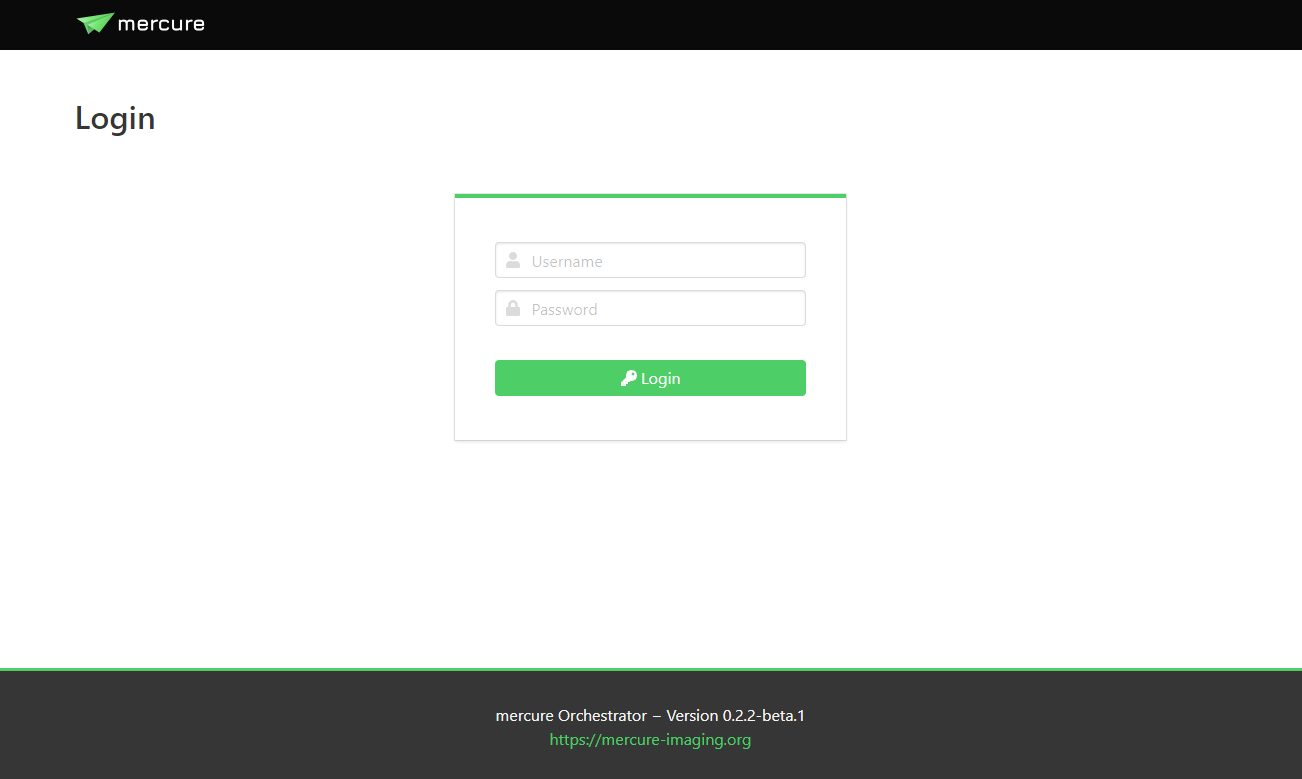

Once logged in you should see the 'Overview' page as shown below.

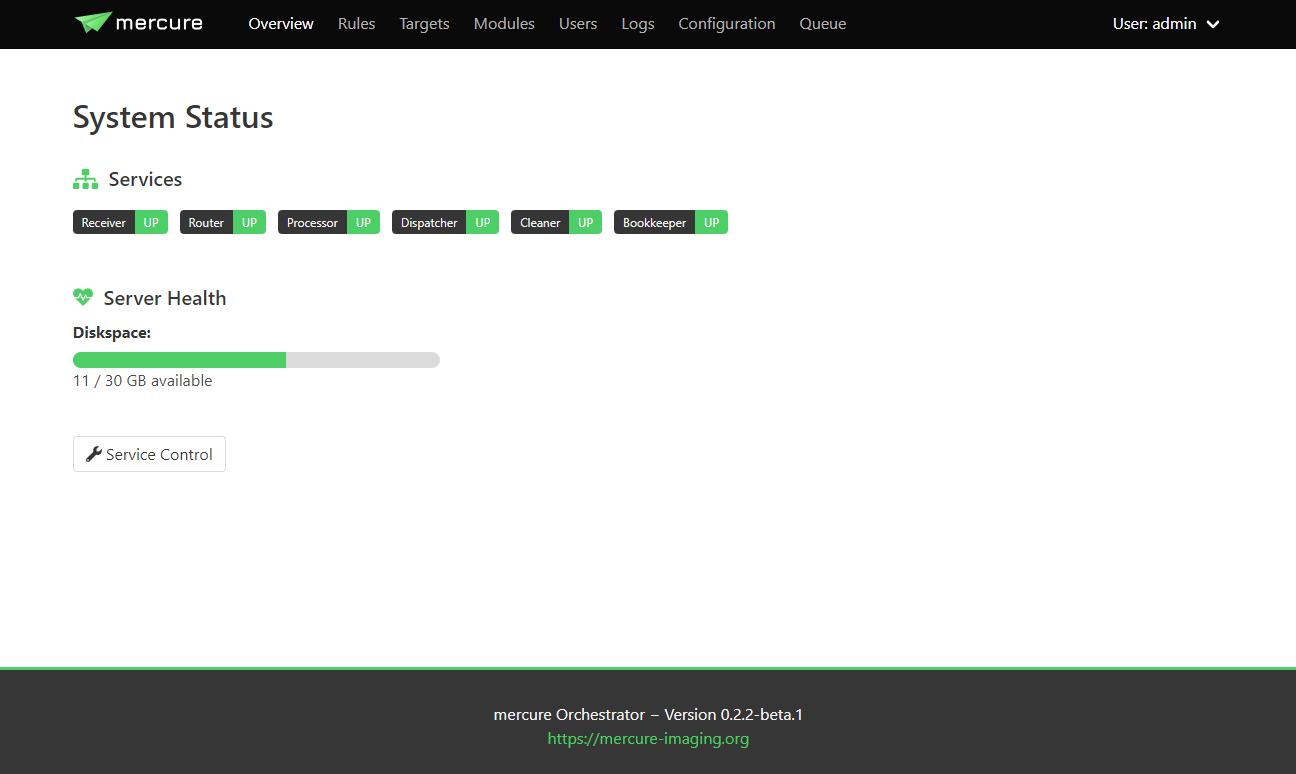

## 2. Add an output directory

Select the *Targets* directory in mercure and click *+Add New*. Provide name 'output_directory', select *Type* 'Folder', and in the *Folder* textbox add '/vagrant' path. Click save and expand the new target you've added and the *Targets* page should look as in the screen shot below.

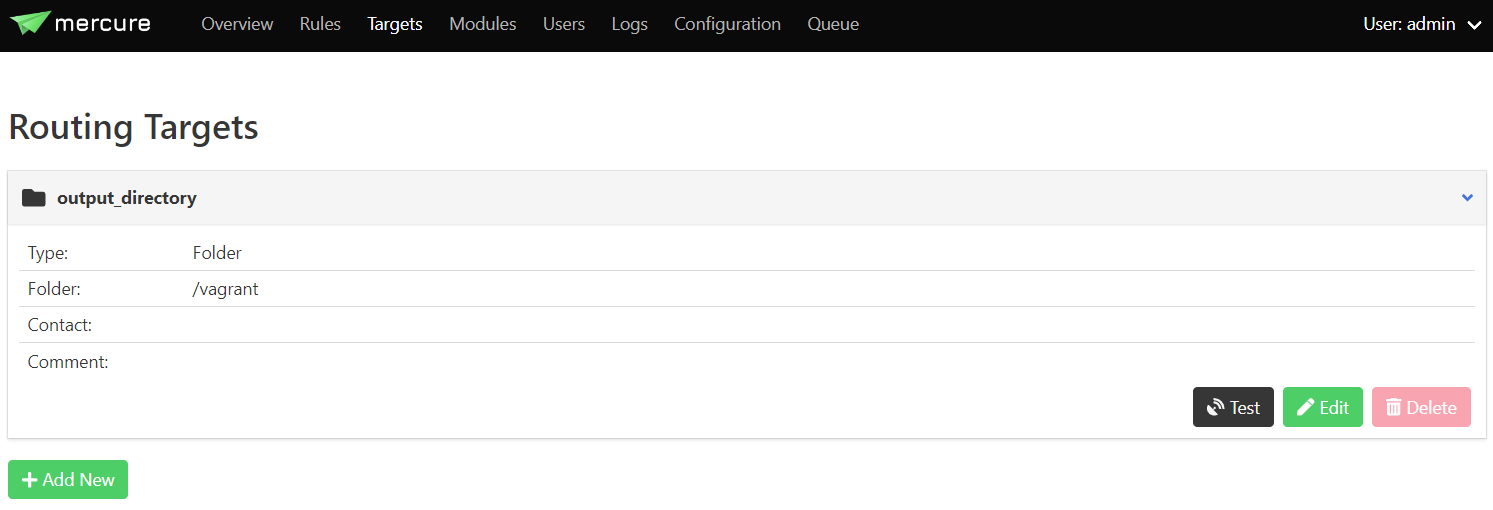

Test that mercure can write to the output directory path by clicking “Test” and the output below should be observed.

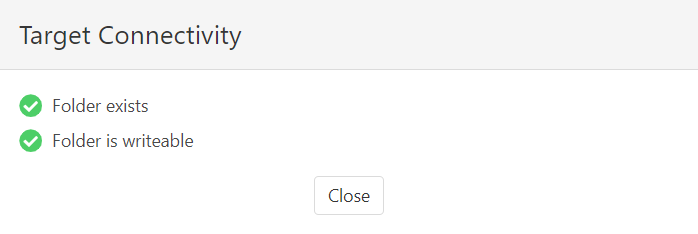

## 3. Configure dcm2bids module in mercure

Add the dcm2bids module to the mercure installation by selecting the *Modules* page and clicking *+ Install Module* Button. Provide a name for the module ('dcm2bids'), enter the settings below, and click 'Install'. **Note:** *Module Type must be 'mercure' (this is the default setting - ignore MONAI setting)*.

> Docker tag: mercureimaging/mercure-dcm2bids  

> Module type: mercure

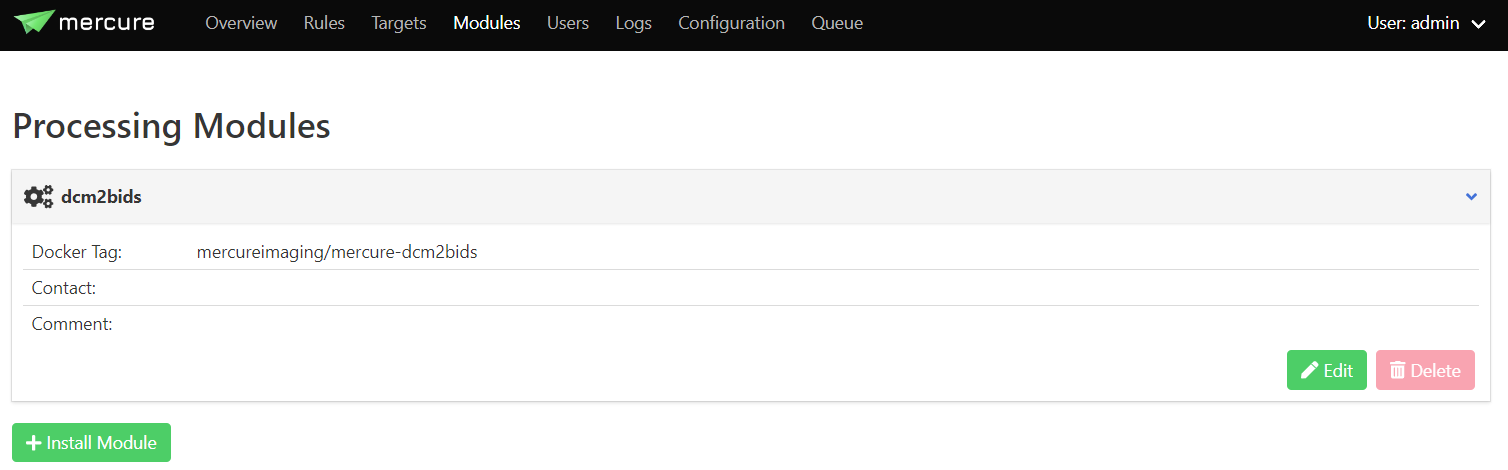

## 4. Add rule to trigger BIDS conversion and write to output directory

We will now setup a rule that will filter incoming image files and will trigger processing using the mercure-dcm2bids module we installed in the previous step. We will also add the BIDS configuration .json text to the rule settings.

Select the *Rules* page in mercure, click *+ Add New*, and provide name 'dcm2bids-first_steps'. Open the rule using the edit button and select the 'Filtering' tab to populate the fields as below and click 'Save' button :

> Selection Rule = True  

> Action = Processing & Routing  

> Trigger = 'Completed Study'  


The *Filtering* settings should look as in the image below, and will trigger processing and routing to be performed on all series sent to mercure once all images in the study have been received. It may take 10-15 mins to trigger processing as completion criteria is set to 'Timeout Reached'. Normally the completion criteria would be configured to trigger processing as soon as all required series have been received.


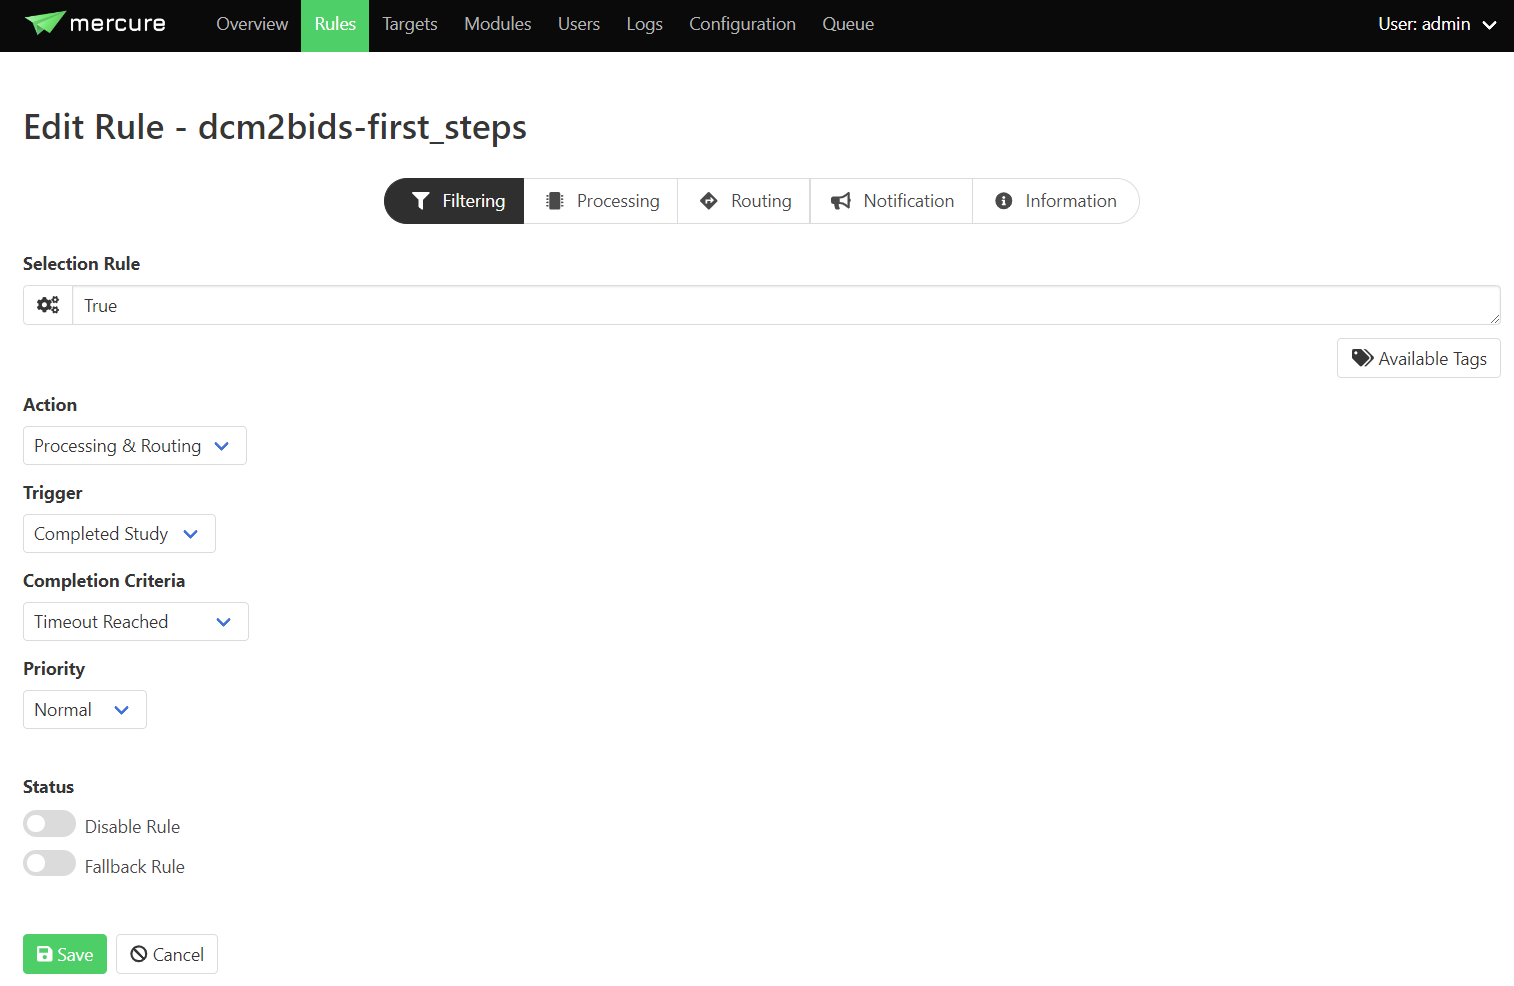

In the 'Processing' tab we will select the mercure-dcm2bids module, the DataFlow setting 'Retain Input Images' can be ignored. Enter the following text into the *Settings* text box.

~~~
{
  "descriptions": [
    {
      "dataType": "func",
      "modalityLabel": "bold",
      "customLabels": "task-rest",
      "criteria": {
        "SeriesDescription": "Axial EPI-FMRI (Interleaved I to S)*"
      },
      "sidecarChanges": {
        "TaskName": "rest"
      }
    },
    {
      "dataType": "fmap",
      "modalityLabel": "epi",
      "customLabels": "dir-AP",
      "criteria": {
        "SeriesDescription": "EPI PE=AP*"
      },
      "intendedFor": 0
    },
    {
      "dataType": "fmap",
      "modalityLabel": "epi",
      "customLabels": "dir-PA",
      "criteria": {
        "SeriesDescription": "EPI PE=PA*"
      },
      "intendedFor": 0
    }
  ]
}
~~~


The 'Processing' tab should now look similar to the screenshot below.

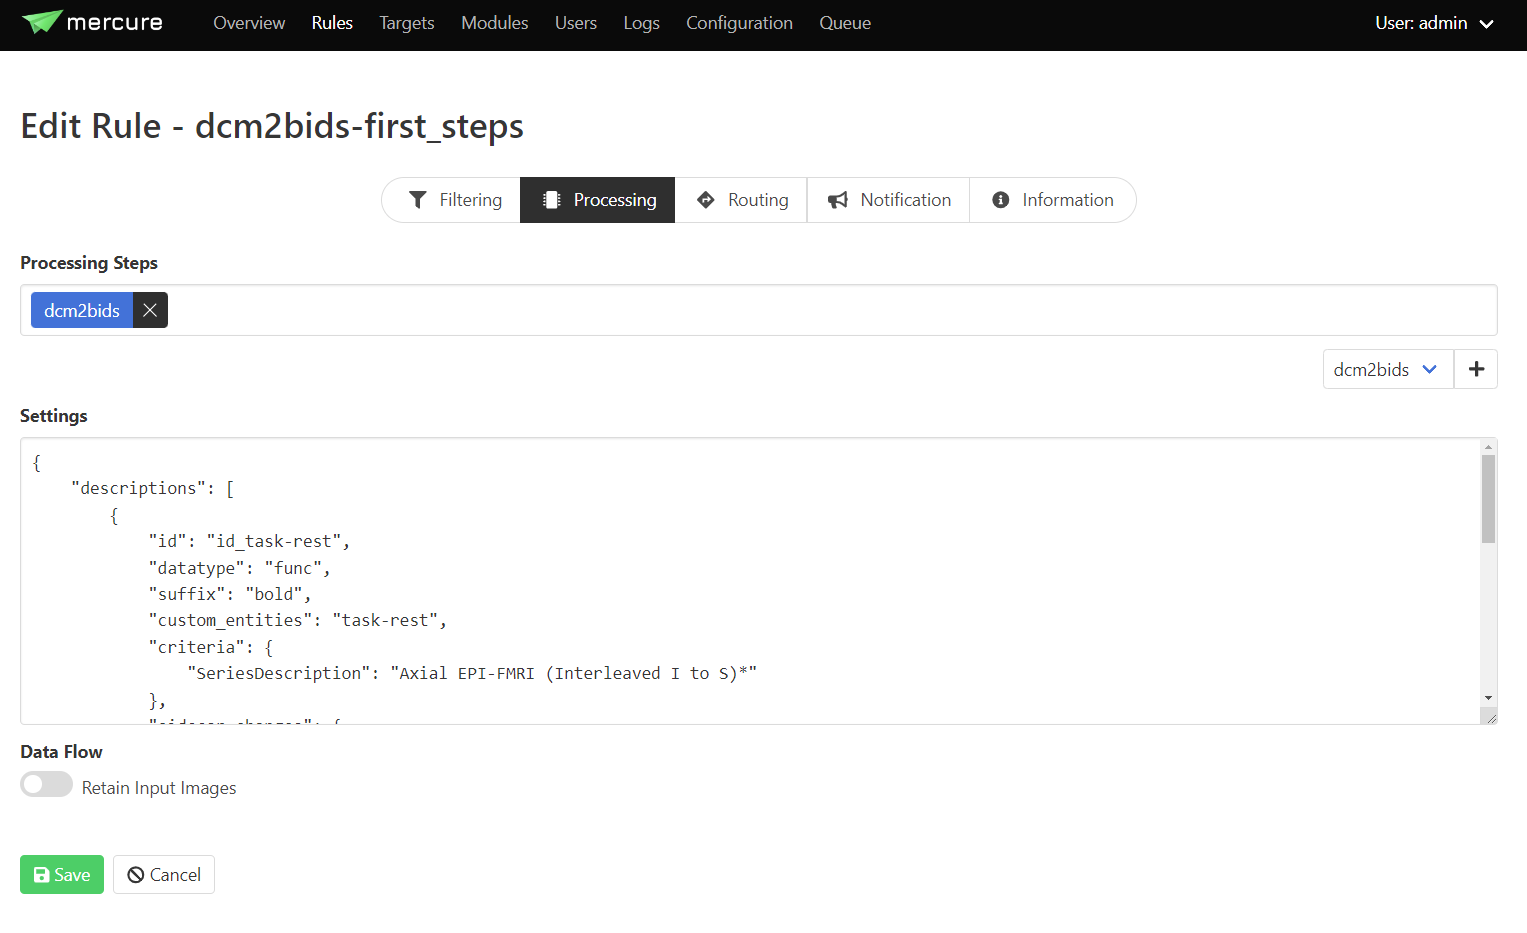

 In the 'Routing' tab we will select the 'output_directory' target and then click 'Save'. This configuration is shown in the images below and is now ready for us to send some images to mercure.

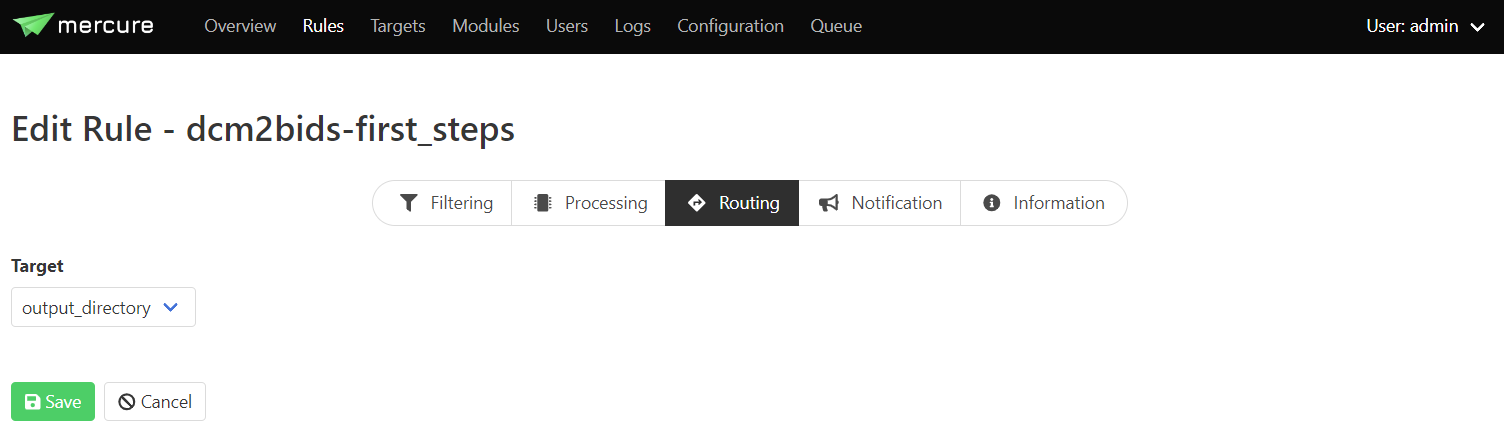

## 5. Download dcm2bids first steps dataset and send to mercure

### 5.1 Download first steps dataset

The mercure-dcm2bids processing module performs BIDS conversion of DICOM images using the dcm2bids converter, we will download the same dataset used in the dcm2bids first steps tutorial:

Instructions for downloading the first steps dataset : [Download neuroimaging data](https://unfmontreal.github.io/Dcm2Bids/docs/tutorial/first-steps/)

The 'In' directory has subdirectories containing the DICOM image files for BIDS conversion.

**Important:** *Delete the 'README-Study.txt' files in the subdirectories within the 'In' directory.*


### 5.2 Send data to mercure

We will send the first steps DICOM images to mercure using the 'dcmsend' tool from the DCMTK tool kit which can be downloaded [here](https://dicom.offis.de/en/dcmtk/dcmtk-tools/) (executable binaries option recommended).

Once DCMTK is installed we verify connectivity using the command below (you may need to specify full path to DCMTK install when running commands).



Test connection to mercure:

In [ ]:
!echoscu -v 127.0.0.1 11112

A successful response should be received as below:

> I: Requesting Association  

> I: Association Accepted (Max Send PDV: 16372)  

> I: Sending Echo Request (MsgID 1)  

> I: Received Echo Response (Success)  

> I: Releasing Association

Next use the 'cd' command below to navigate to the parent directory path of 'In' directory. 

In [ ]:
%cd --REPLACE THIS TEXT WITH PARENT DIRECTORY PATH OF IN DIRECTORY--

Run command below to send data to mercure for BIDS conversion. Note: this command will fail if there are any remaining .txt files in the subdirectories.

In [ ]:
!dcmsend -v +sd +r 127.0.0.1 11112 ./In

Select the *Queue* page in mercure, and after a few minutes you should see that two entries appear in the *Studies* tab (click to select). Once the timeout has completed (900s by default) processing will begin. The refresh button in the top right can be used to update the page. If you do not want to wait for the timeout, you can click on a study in the queue below and select 'Force' processing by clicking the small icon above the queue consisting of a circle with a triangle inside of it.

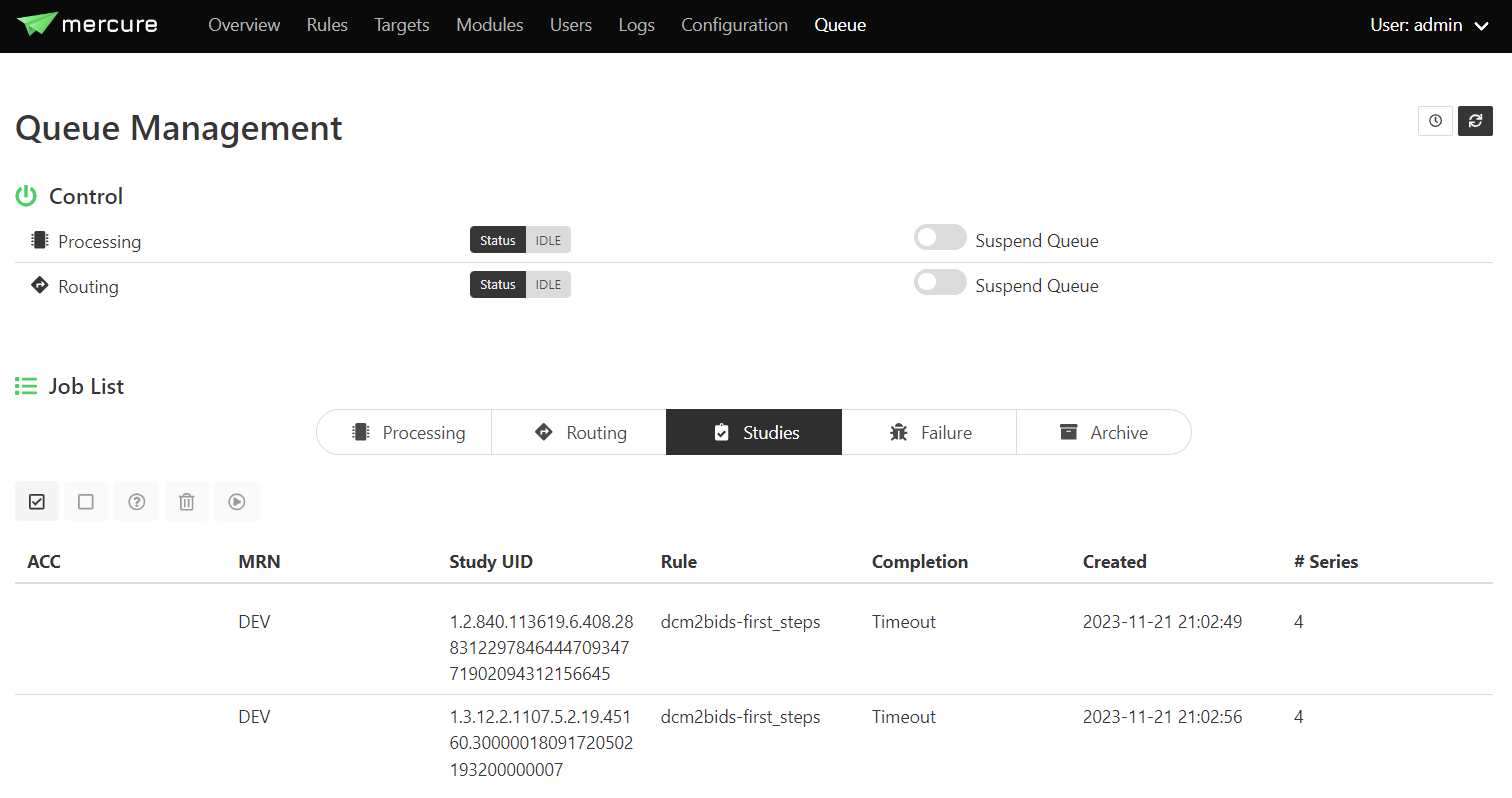

The first time a module is used, the Docker image must be downloaded from Dockerhub which may take a few minutes (~10 mins). Subsequent runs with up-to-date docker containers should process much quicker. 

Processing progress can be monitored in the 'Processor' tab in the 'Logs' page of mercure. 

Once processing has finished it will disappear from the processing queue and the audit trail (as shown below) can be viewed by clicking on 'Archive' on the right hand side, highlighting the entry in the job list by clicking on it, and then clicking on the 'Audit trail' button:

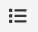

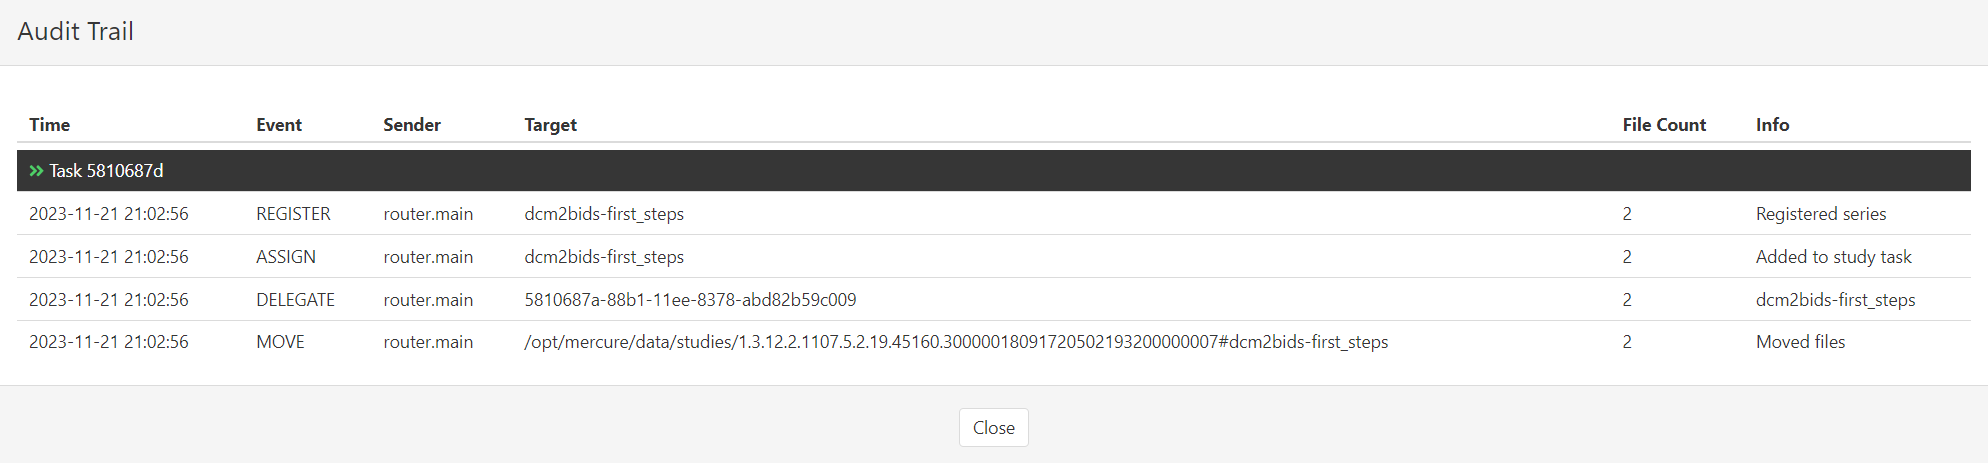

## 6. Converted BIDS data

Converted BIDS data can be found in the *mercure/addons/vagrant/systemd* directory of the mercure installation.

There will be two directories created each with a zipped dataset inside of it named 'BIDS_DEV_.zip'

The conversion can be checked once .zip archives are extracted using the online [BIDS Validator tool](https://bids-standard.github.io/bids-validator/).

**Congratulations, you have successfully installed mercure and deployed the mercure-dcm2bids module that can receive DICOM images, perform DICOM to BIDS format conversion, and send results to an output directory.** 

More information can be found [here](https://mercure-imaging.org/) on how to setup and configure mercure for your specific DICOM orchestration requirements. There is also a chat feature on this website for questions not covered in the documentation or to report software issues and bugs. 

Further details on the mercure-dcm2bids module can be found in the mercure github repository [here](https://github.com/mercure-imaging/mercure-dcm2bids).

To shutdown virtual machine run the vagrant command below:

In [ ]:
!vagrant halt

Alternatively, if you wish to remove the vagrant machine, the 'vagrant destroy' command can be used.